# Prediction Using Supervised Machine Learning

## Background 

This data looks at a student’s exam performance denoted by ‘score’ and hours they have spent studying for an exam denoted by ‘hours’. We would expect that the greater the hours spent studying, the better the exam scores. In this project I will analyse the relationship between the two variables and make simple predictions using the data extracted from http://bit.ly/w-data.

## Problem Statement 

Student’s performance is determined by hours spent revising but is it always the case that more hours spent studying equals better scores or could there be anomalies? I will be making a simple prediction on score based off 9.25 hrs/ day. 

## Methodology

To make a prediction and analyse the relationship between the two variables I will be using Python-Scikit Learn library for machine learning. This package will allow us to implement regression functions. First, I ensured that the data being used was in the correct format and that there no errors or NULL values in the dataset to get the correct output. I completed this using Excel and converted the file into a .csv file.

# 1-  Importing relevant libraries


In [3]:
pip install lux-api # data visualisation module installed

Note: you may need to restart the kernel to use updated packages.


In [47]:
import requests
import pandas as pd
import numpy as np 
import lux
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error

In [5]:
# Now the relevant libraries and packages are installed, we can use these to carry out the relevant analysis

# 2- Loading dataset from .CSV File and displaying

## The dataset:

In [4]:
# obtaining the relevant dataset of the scores and hours spent studying

scores = "/Users/jovan/Desktop/Exam Scores vs Hours.csv"


In [5]:
scores = pd.read_csv(scores) #get the keys for each column and distinct variables
scores.keys()

Index(['Hours / Day', 'Scores'], dtype='object')

In [6]:
scores # the table shows the hours spent studying by each student and the corresponding exam scores obtained.

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

# 3- Generating Descriptive Statistics 

In [7]:
scores.head() # gives the first 5 results

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [8]:
print(scores.shape) # columns and rows 

(25, 2)


In [9]:
scores.isnull().values.any() # There are no NULL values in our dataset

False

In [10]:
dataTypeDict = dict(scores.dtypes) # gives us what type of data this is
print(dataTypeDict)

{'Hours / Day': dtype('float64'), 'Scores': dtype('int64')}


In [11]:
print(scores.describe()) # descriptive statistics

       Hours / Day     Scores
count    25.000000  25.000000
mean      5.012000  51.480000
std       2.525094  25.286887
min       1.100000  17.000000
25%       2.700000  30.000000
50%       4.800000  47.000000
75%       7.400000  75.000000
max       9.200000  95.000000


Average hours studied was 4.8 hrs/ day and the average score obtained across all students was 47 marks. We also found that the highest marks scored by a student was 95 marks and the lowest being 17 marks. 

# 4- Splitting dataset into Training & Testing Groups

Algorithm training in order to make predictions for hours studied and its equivalent exam scores. 

In [18]:
train,test = train_test_split(scores,test_size=0.2)

In [20]:
train.shape

(20, 2)

In [21]:
test.shape

(5, 2)

In [25]:
train_x=train.drop('Scores',axis=1)
train_y=train['Scores']

In [26]:
test_x=test.drop('Scores',axis=1)
test_y=test['Scores']

# 5- Training 

Using linear regression training for the dataset.

- We now also produce statistics such as coefficient and intercept, the relationship for our training dataset to provide a general overview of the data that we are using.

In [27]:
linear_regression=LinearRegression()

In [28]:
linear_regression.fit(train_x,train_y)

LinearRegression()

In [35]:
linear_regression.coef_


array([9.50829167])

In [36]:
linear_regression.intercept_

3.9191760458696194

In [38]:
# y=mx+c 

line=linear_regression.coef_*train_x+linear_regression.intercept_

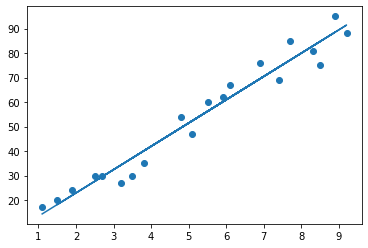

In [42]:
plt.scatter(train_x,train_y)
plt.plot(train_x,line);
plt.show()

# 6- Using the testing to make predictions 

In [43]:
prediction=linear_regression.predict(test_x)

In [45]:
list(zip(test_y,prediction))

[(25, 29.591563543697763),
 (42, 35.29653854321513),
 (41, 46.70648854224986),
 (21, 27.689905210525307),
 (86, 78.08385103959536)]

# 7- Comments On The Model


In [48]:
mean_squared_error(test_y,prediction,squared=False)

6.418771048267304

# 8- Problem Solution

Student’s performance is determined by hours spent revising but is it always the case that more hours spent studying equals better scores or could there be anomalies? I will be making a simple prediction on score based off 9.25 hrs/ day.

In [51]:
Hours = [9.25]
question_prediction=linear_regression.predict([Hours])
print("Hours per day = {}".format([Hours]))
print("Predicted Score = {}".format(question_prediction[0]))


Hours per day = [[9.25]]
Predicted Score = 91.87087395509566


The final prediction that was made based of the trained model tells us that a student that spends roughly 9.25Hrs/Day studying will attain exam score of 92 marks. Based of the positive correlation between hours of studying and scores I would conclude that this is a fairly accurate prediction made by the algorithm. 